# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Richard Rafelson
- **Email:** Richardrflsn@gmail.com
- **ID Dicoding:** richard_rflsn

## Menentukan Pertanyaan Bisnis

- Apa distribusi frekuensi pembelian berdasarkan wilayah atau kota pelanggan?
- Apa metode pembayaran yang paling sering digunakan oleh pelanggan, dan bagaimana tren ini berubah dari waktu ke waktu?

## Import Semua Packages/Library yang Digunakan

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

## Data Wrangling

### Gathering Data

In [116]:
customers_df = pd.read_csv("data/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [117]:
geolocation_df = pd.read_csv("data/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [118]:
orderItems_df = pd.read_csv("data/order_items_dataset.csv")
orderItems_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [119]:

orderPayments_df = pd.read_csv("data/order_payments_dataset.csv")
orderPayments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [120]:
orderReviews_df = pd.read_csv("data/order_reviews_dataset.csv")
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [121]:
orders_df = pd.read_csv("data/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [122]:
productCategory_df = pd.read_csv("data/product_category_name_translation.csv")
productCategory_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [123]:
products_df = pd.read_csv("data/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [124]:
sellers_df = pd.read_csv("data/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

##### Customers Dataset

In [125]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [126]:
print("Jumlah duplikasi: ",customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Geolocation Dataset

In [127]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [128]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())
geolocation_df.describe()

Jumlah duplikasi:  261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


##### Order Items Dataset

In [129]:
orderItems_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [130]:
print("Jumlah duplikasi: ",orderItems_df.duplicated().sum())
orderItems_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Order Payments Dataset

In [131]:
orderPayments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [132]:
print("Jumlah duplikasi: ",orderPayments_df.duplicated().sum())
orderPayments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Order Reviews Dataset

In [133]:
orderReviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [134]:
orderReviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [135]:
print("Jumlah duplikasi: ",orderReviews_df.duplicated().sum())
orderReviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Orders Dataset

In [136]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [137]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [138]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Product Category Dataset

In [139]:
productCategory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [140]:
print("Jumlah duplikasi: ",productCategory_df.duplicated().sum())
productCategory_df.describe()

Jumlah duplikasi:  0


,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


##### Products Dataset

In [141]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [142]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [143]:
print("Jumlah duplikasi: ",products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Sellers Dataset

In [144]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [145]:
print("Jumlah duplikasi: ",sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


#### Summary Assessing Data

In [146]:
def compute_summary(df):
    missing_values = df.isnull().sum().sum()
    duplicate_data = df.duplicated().sum()
    inaccurate_values = (df.select_dtypes(include=[np.number]) <= 0).sum().sum()
    return missing_values, duplicate_data, inaccurate_values

customers_stats = compute_summary(customers_df)
geolocation_stats = compute_summary(geolocation_df)
orderItems_stats = compute_summary(orderItems_df)
orderPayments_stats = compute_summary(orderPayments_df)
orderReviews_stats = compute_summary(orderReviews_df)
orders_stats = compute_summary(orders_df)
productCategory_stats = compute_summary(productCategory_df)
products_stats = compute_summary(products_df)
sellers_stats = compute_summary(sellers_df)

summary = pd.DataFrame({
    'DataFrame': ['customers_df', 'geolocation_df', 'orderItems_df', 'orderPayments_df', 'orderReviews_df', 'orders_df', 'productCategory_df', 'products_df', 'sellers_df'],
    'Missing Values': [customers_stats[0], geolocation_stats[0], orderItems_stats[0], orderPayments_stats[0], orderReviews_stats[0], orders_stats[0], productCategory_stats[0], products_stats[0], sellers_stats[0]],
    'Duplicate Data': [customers_stats[1], geolocation_stats[1], orderItems_stats[1], orderPayments_stats[1], orderReviews_stats[1], orders_stats[1], productCategory_stats[1], products_stats[1], sellers_stats[1]],
    'Inaccurate Values': [customers_stats[2], geolocation_stats[2], orderItems_stats[2], orderPayments_stats[2], orderReviews_stats[2], orders_stats[2], productCategory_stats[2], products_stats[2], sellers_stats[2]],
})

print(summary)

            DataFrame  Missing Values  Duplicate Data  Inaccurate Values
0        customers_df               0               0                0.0
1      geolocation_df               0          261831          1998987.0
2       orderItems_df               0               0              383.0
3    orderPayments_df               0               0               11.0
4     orderReviews_df          145903               0                0.0
5           orders_df            4908               0                0.0
6  productCategory_df               0               0                0.0
7         products_df            2448               0                4.0
8          sellers_df               0               0                0.0


### Cleaning Data

##### Cleaning Geolocation Dataset

In [147]:
geolocation_df.drop_duplicates(inplace=True)

In [148]:
print("Jumlah duplikasi: ",geolocation_df.duplicated().sum())

Jumlah duplikasi:  0


In [149]:
geolocation_df['geolocation_lat'] = pd.to_numeric(geolocation_df['geolocation_lat'], errors='coerce')
geolocation_df['geolocation_lng'] = pd.to_numeric(geolocation_df['geolocation_lng'], errors='coerce')

# Rentang latitude dan longtitude yang valid
valid_latitude_range = (-90, 90)
valid_longitude_range = (-180, 180)

# Filter latitude dan longitude yang tidak valid
geolocation_df = geolocation_df[
    (geolocation_df['geolocation_lat'].between(valid_latitude_range[0], valid_latitude_range[1])) &
    (geolocation_df['geolocation_lng'].between(valid_longitude_range[0], valid_longitude_range[1]))
]

geolocation_df = geolocation_df[
    (geolocation_df['geolocation_lat'] != 0) &
    (geolocation_df['geolocation_lng'] != 0)
]


geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


##### Cleaning Order Items Dataset

In [150]:
def clean_order_items(df):
    # Tentukan ambang batas untuk pembersihan
    price_threshold_upper = df['price'].quantile(0.75) + 1.5 * (df['price'].quantile(0.75) - df['price'].quantile(0.25))
    freight_value_threshold_upper = df['freight_value'].quantile(0.75) + 1.5 * (df['freight_value'].quantile(0.75) - df['freight_value'].quantile(0.25))
    
    # Saring nilai yang tidak valid
    cleaned_df = df[
        (df['price'] >= 0) &
        (df['freight_value'] >= 0) &
        (df['price'] <= price_threshold_upper) &
        (df['freight_value'] <= freight_value_threshold_upper)
    ]
    
    return cleaned_df

orderItems_df = clean_order_items(orderItems_df)

print(orderItems_df.describe())

       order_item_id         price  freight_value
count   95605.000000  95605.000000   95605.000000
mean        1.207562     79.676476      15.799154
std         0.723189     56.142973       5.472317
min         1.000000      0.850000       0.000000
25%         1.000000     35.900000      12.580000
50%         1.000000     62.900000      15.370000
75%         1.000000    109.900000      18.440000
max        21.000000    277.000000      33.250000


##### Cleaning Order Payments Dataset

In [151]:
max_amount = 10000
min_amount = 0 

orderPayments_df['payment_value'] = pd.to_numeric(orderPayments_df['payment_value'], errors='coerce')

# Ganti nilai yang berada di luar rentang yang valid
orderPayments_df.loc[orderPayments_df['payment_value'] > max_amount, 'payment_value'] = np.nan
orderPayments_df.loc[orderPayments_df['payment_value'] < min_amount, 'payment_value'] = np.nan

# Tangani nilai yang hilang jika diperlukan (misalnya, isi dengan median atau hapus baris)
median_value = orderPayments_df['payment_value'].median()
orderPayments_df['payment_value'] = orderPayments_df['payment_value'].fillna(median_value)


##### Cleaning Order Reviews Dataset

In [152]:
orderReviews_df['review_comment_title'] = orderReviews_df['review_comment_title'].fillna('No Title')
orderReviews_df['review_comment_message'] = orderReviews_df['review_comment_message'].fillna('No Message')

orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

In [153]:
orderReviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,No Title,No Message,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,No Title,No Message,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,No Title,No Message,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,No Title,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,No Title,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


##### Cleaning Orders Dataset

In [154]:
orders_df['order_approved_at'] = orders_df['order_approved_at'].fillna('Unknown')
orders_df['order_delivered_carrier_date'] = orders_df['order_delivered_carrier_date'].fillna('Unknown')
orders_df['order_delivered_customer_date'] = orders_df['order_delivered_customer_date'].fillna('Unknown')

orderReviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

##### Cleaning Products Dataset

In [155]:
threshold = 0.25
columns_to_drop = products_df.columns[products_df.isnull().mean() > threshold]
products_df = products_df.drop(columns=columns_to_drop)

# Impute numerical columns
numerical_columns = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for column in numerical_columns:
    median_value = products_df[column].median()
    products_df[column] = products_df[column].fillna(median_value)

# Impute categorical columns
categorical_columns = ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
for column in categorical_columns:
    mode_value = products_df[column].mode()[0]
    products_df[column] = products_df[column].fillna(mode_value)

print(products_df.isnull().sum())

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


In [156]:
def handle_inaccurate_values(df):
    # Contoh ambang batas untuk pembersihan
    max_weight = 10000  # Contoh ambang batas berat dalam gram
    max_length = 1000   # Contoh ambang batas panjang dalam cm
    max_height = 1000   # Contoh ambang batas tinggi dalam cm
    max_width = 1000    # Contoh ambang batas lebar dalam cm

    # Menangani nilai yang tidak akurat untuk kolom numerik
    df.loc[df['product_weight_g'] > max_weight, 'product_weight_g'] = np.nan
    df.loc[df['product_length_cm'] > max_length, 'product_length_cm'] = np.nan
    df.loc[df['product_height_cm'] > max_height, 'product_height_cm'] = np.nan
    df.loc[df['product_width_cm'] > max_width, 'product_width_cm'] = np.nan

    # Menangani nilai yang tidak akurat untuk kolom kategorikal
    df.loc[df['product_weight_g'] <= 0, 'product_weight_g'] = np.nan
    df.loc[df['product_length_cm'] <= 0, 'product_length_cm'] = np.nan
    df.loc[df['product_height_cm'] <= 0, 'product_height_cm'] = np.nan
    df.loc[df['product_width_cm'] <= 0, 'product_width_cm'] = np.nan

    # Menangani nilai yang tidak akurat untuk kolom lainnya
    for column in ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)
    
    return df

products_df = handle_inaccurate_values(products_df)

products_df.describe()



,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.690267,764.692088,2.166975,1345.273436,30.814725,16.937422,23.196534
std,10.268615,631.155852,1.728063,1849.263615,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,52.000000,584.000000,1.000000,625.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1401.500000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,10000.000000,105.000000,105.000000,118.000000


#### Summary

In [157]:
customers_stats = compute_summary(customers_df)
geolocation_stats = compute_summary(geolocation_df)
orderItems_stats = compute_summary(orderItems_df)
orderPayments_stats = compute_summary(orderPayments_df)
orderReviews_stats = compute_summary(orderReviews_df)
orders_stats = compute_summary(orders_df)
productCategory_stats = compute_summary(productCategory_df)
products_stats = compute_summary(products_df)
sellers_stats = compute_summary(sellers_df)

summary = pd.DataFrame({
    'DataFrame': ['customers_df', 'geolocation_df', 'orderItems_df', 'orderPayments_df', 'orderReviews_df', 'orders_df', 'productCategory_df', 'products_df', 'sellers_df'],
    'Missing Values': [customers_stats[0], geolocation_stats[0], orderItems_stats[0], orderPayments_stats[0], orderReviews_stats[0], orders_stats[0], productCategory_stats[0], products_stats[0], sellers_stats[0]],
    'Duplicate Data': [customers_stats[1], geolocation_stats[1], orderItems_stats[1], orderPayments_stats[1], orderReviews_stats[1], orders_stats[1], productCategory_stats[1], products_stats[1], sellers_stats[1]],
    'Inaccurate Values': [customers_stats[2], geolocation_stats[2], orderItems_stats[2], orderPayments_stats[2], orderReviews_stats[2], orders_stats[2], productCategory_stats[2], products_stats[2], sellers_stats[2]],
})

print(summary)

            DataFrame  Missing Values  Duplicate Data  Inaccurate Values
0        customers_df               0               0                0.0
1      geolocation_df               0               0          1475490.0
2       orderItems_df               0               0              382.0
3    orderPayments_df               0               0               11.0
4     orderReviews_df               0               0                0.0
5           orders_df               0               0                0.0
6  productCategory_df               0               0                0.0
7         products_df               0               0                0.0
8          sellers_df               0               0                0.0


## Exploratory Data Analysis (EDA)

### Explore ...

##### Customer and Order Analysis

In [158]:
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id')
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [159]:
purchase_distribution = orders_customers_df['customer_city'].value_counts()
print("Distribusi Frekuensi Pembelian Berdasarkan Kota atau Wilayah:")
print(purchase_distribution)

Distribusi Frekuensi Pembelian Berdasarkan Kota atau Wilayah:
customer_city
sao paulo           15540
rio de janeiro       6882
belo horizonte       2773
brasilia             2131
curitiba             1521
                    ...  
vila nova do sul        1
cuite velho             1
novais                  1
jacuipe                 1
nova vicosa             1
Name: count, Length: 4119, dtype: int64


In [160]:
purchase_distribution_state = orders_customers_df['customer_state'].value_counts()
print("Distribusi Frekuensi Pembelian Berdasarkan Provinsi atau Negara Bagian:")
print(purchase_distribution_state)

Distribusi Frekuensi Pembelian Berdasarkan Provinsi atau Negara Bagian:
customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64


##### Payments Analysis

In [161]:
payment_method_distribution = orderPayments_df['payment_type'].value_counts()

In [162]:
print("Distribusi Metode Pembayaran:")
print(payment_method_distribution)

Distribusi Metode Pembayaran:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


 Payment Tren

In [163]:
payments_orders_df = pd.merge(orderPayments_df, orders_df, on='order_id')
payments_orders_df['order_purchase_timestamp'] = pd.to_datetime(payments_orders_df['order_purchase_timestamp'])
payments_orders_df['year_month'] = payments_orders_df['order_purchase_timestamp'].dt.to_period('M')
payment_trends = payments_orders_df.groupby(['year_month', 'payment_type']).size().unstack().fillna(0)

print("Tren Penggunaan Metode Pembayaran dari Waktu ke Waktu:")
print(payment_trends)

Tren Penggunaan Metode Pembayaran dari Waktu ke Waktu:
payment_type  boleto  credit_card  debit_card  not_defined  voucher
year_month                                                         
2016-09          0.0          3.0         0.0          0.0      0.0
2016-10         63.0        254.0         2.0          0.0     23.0
2016-12          0.0          1.0         0.0          0.0      0.0
2017-01        197.0        583.0         9.0          0.0     61.0
2017-02        398.0       1356.0        13.0          0.0    119.0
2017-03        590.0       2016.0        31.0          0.0    200.0
2017-04        496.0       1846.0        27.0          0.0    202.0
2017-05        772.0       2853.0        30.0          0.0    289.0
2017-06        707.0       2463.0        27.0          0.0    239.0
2017-07        845.0       3086.0        22.0          0.0    364.0
2017-08        938.0       3284.0        34.0          0.0    294.0
2017-09        903.0       3283.0        43.0          0.0   

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Apa distribusi frekuensi pembelian berdasarkan wilayah atau kota pelanggan?

In [164]:
state_customer_counts = customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

state_customer_counts_df = state_customer_counts.reset_index()
state_customer_counts_df.columns = ['State', 'Unique Customer Count']

print("\nJumlah Pelanggan Unik menurut Negara Bagian:")
print(tabulate(state_customer_counts_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Jumlah Pelanggan Unik menurut Negara Bagian:
╒═════════╤═════════════════════════╕
│ State   │   Unique Customer Count │
╞═════════╪═════════════════════════╡
│ SP      │                   41746 │
├─────────┼─────────────────────────┤
│ RJ      │                   12852 │
├─────────┼─────────────────────────┤
│ MG      │                   11635 │
├─────────┼─────────────────────────┤
│ RS      │                    5466 │
├─────────┼─────────────────────────┤
│ PR      │                    5045 │
├─────────┼─────────────────────────┤
│ SC      │                    3637 │
├─────────┼─────────────────────────┤
│ BA      │                    3380 │
├─────────┼─────────────────────────┤
│ DF      │                    2140 │
├─────────┼─────────────────────────┤
│ ES      │                    2033 │
├─────────┼─────────────────────────┤
│ GO      │                    2020 │
├─────────┼─────────────────────────┤
│ PE      │                    1652 │
├─────────┼─────────────────────────┤
│ CE

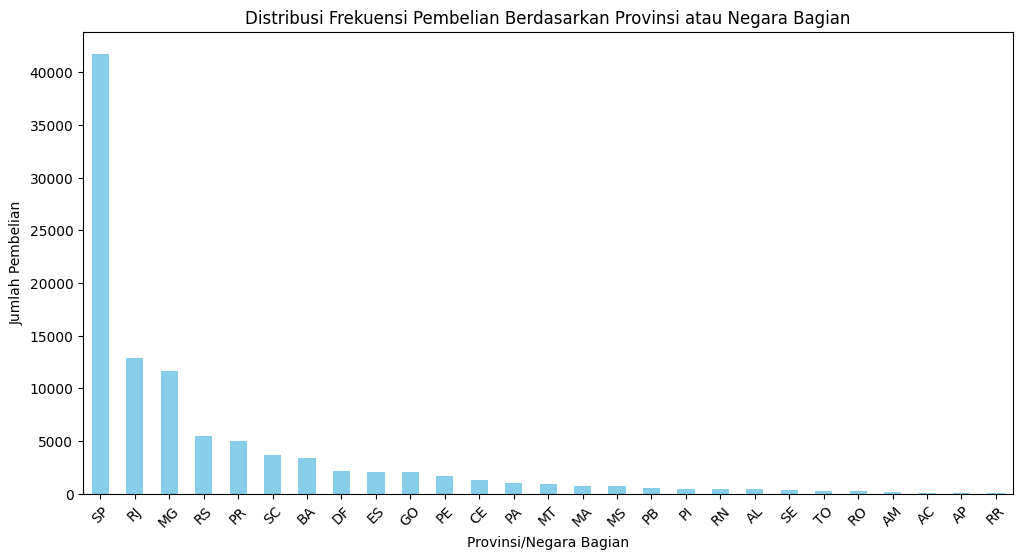

In [165]:
# Buat grafik batang
plt.figure(figsize=(12, 6))
purchase_distribution_state.plot(kind='bar', color='skyblue')
plt.title('Distribusi Frekuensi Pembelian Berdasarkan Provinsi atau Negara Bagian')
plt.xlabel('Provinsi/Negara Bagian')
plt.ylabel('Jumlah Pembelian')
plt.xticks(rotation=45)
plt.show()

In [166]:
city_customer_counts = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

city_customer_counts_df = city_customer_counts.reset_index()
city_customer_counts_df.columns = ['City', 'Unique Customer Count']

print("\nJumlah Pelanggan Unik Berdasarkan Kota:")
print(tabulate(city_customer_counts_df, headers='keys', tablefmt='fancy_grid', showindex=False))


Jumlah Pelanggan Unik Berdasarkan Kota:
╒══════════════════════════════════╤═════════════════════════╕
│ City                             │   Unique Customer Count │
╞══════════════════════════════════╪═════════════════════════╡
│ sao paulo                        │                   15540 │
├──────────────────────────────────┼─────────────────────────┤
│ rio de janeiro                   │                    6882 │
├──────────────────────────────────┼─────────────────────────┤
│ belo horizonte                   │                    2773 │
├──────────────────────────────────┼─────────────────────────┤
│ brasilia                         │                    2131 │
├──────────────────────────────────┼─────────────────────────┤
│ curitiba                         │                    1521 │
├──────────────────────────────────┼─────────────────────────┤
│ campinas                         │                    1444 │
├──────────────────────────────────┼─────────────────────────┤
│ porto alegre

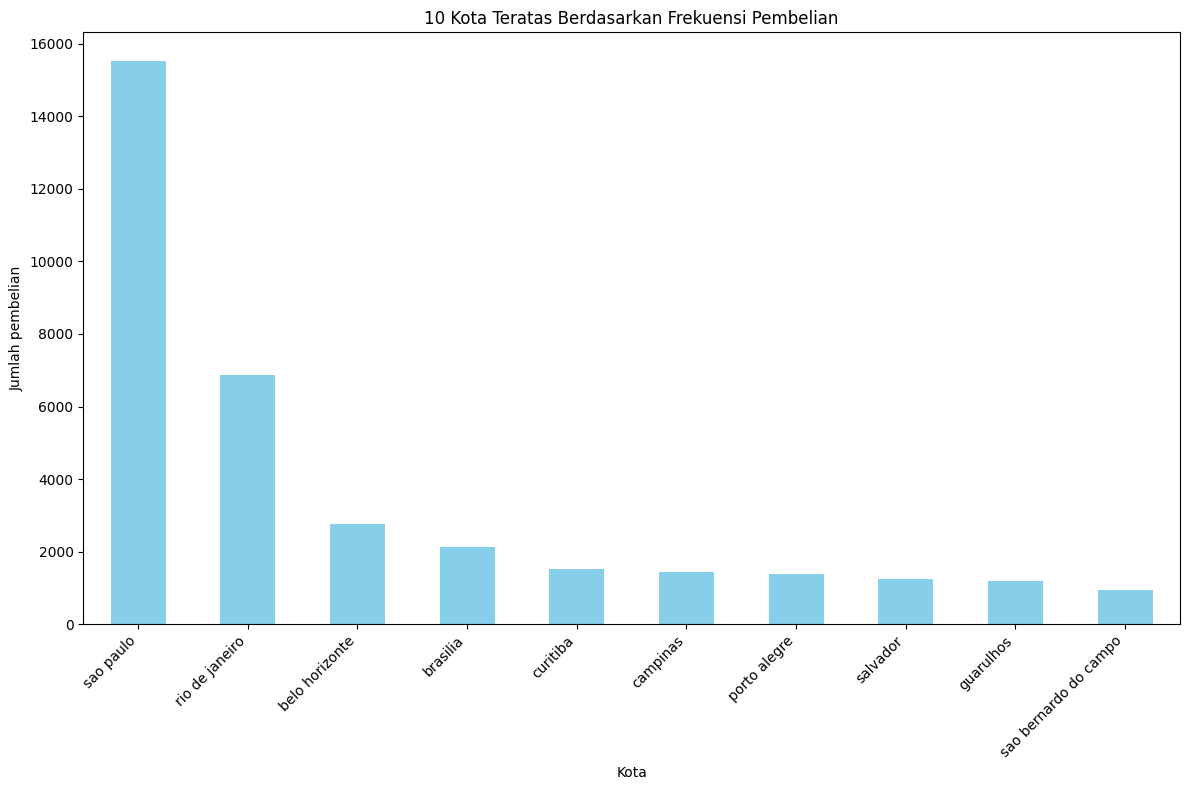

In [167]:
purchase_distribution = orders_customers_df['customer_city'].value_counts()

top_10_cities = purchase_distribution.head(10)

plt.figure(figsize=(12, 8))
top_10_cities.plot(kind='bar', color='skyblue')

plt.title('10 Kota Teratas Berdasarkan Frekuensi Pembelian')
plt.xlabel('Kota')
plt.ylabel('Jumlah pembelian')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

### Pertanyaan 2:

Apa metode pembayaran yang paling sering digunakan oleh pelanggan, dan bagaimana tren ini berubah dari waktu ke waktu?

In [168]:
payment_method_df = payment_method_distribution.reset_index()
payment_method_df.columns = ['Payment Method', 'Count']

# Menghitung persentase
payment_method_df['Percentage'] = (payment_method_df['Count'] / payment_method_df['Count'].sum()) * 100

# Format persentase menjadi dua tempat desimal
payment_method_df['Percentage'] = payment_method_df['Percentage'].map('{:.3f}%'.format)

print("Distribusi Metode Pembayaran:")
print(tabulate(payment_method_df, headers='keys', tablefmt='fancy_grid', showindex=False))

Distribusi Metode Pembayaran:
╒══════════════════╤═════════╤══════════════╕
│ Payment Method   │   Count │ Percentage   │
╞══════════════════╪═════════╪══════════════╡
│ credit_card      │   76795 │ 73.922%      │
├──────────────────┼─────────┼──────────────┤
│ boleto           │   19784 │ 19.044%      │
├──────────────────┼─────────┼──────────────┤
│ voucher          │    5775 │ 5.559%       │
├──────────────────┼─────────┼──────────────┤
│ debit_card       │    1529 │ 1.472%       │
├──────────────────┼─────────┼──────────────┤
│ not_defined      │       3 │ 0.003%       │
╘══════════════════╧═════════╧══════════════╛


Text(0.5, 1.0, 'Distribusi Metode Pembayaran (Pie Chart)')

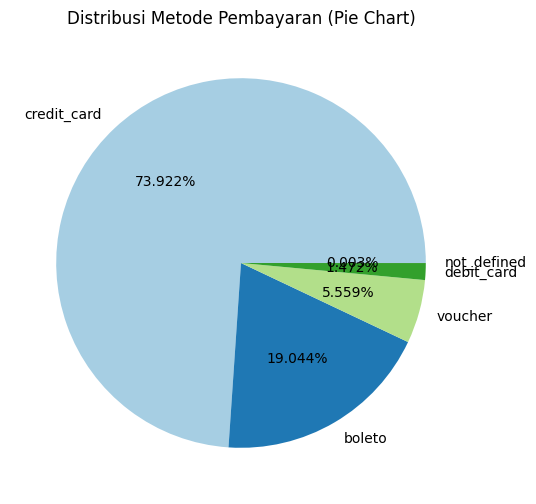

In [169]:
payment_method_distribution = orderPayments_df['payment_type'].value_counts()
payment_method_percentages = (payment_method_distribution / payment_method_distribution.sum()) * 100

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.pie(payment_method_percentages, labels=payment_method_percentages.index, autopct='%1.3f%%', colors=plt.cm.Paired(range(len(payment_method_percentages))))
plt.title('Distribusi Metode Pembayaran (Pie Chart)')

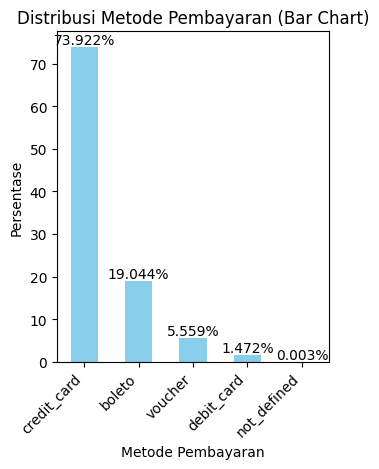

In [170]:
plt.subplot(1, 2, 2)
bars = payment_method_percentages.plot(kind='bar', color='skyblue')
plt.title('Distribusi Metode Pembayaran (Bar Chart)')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Persentase')
plt.xticks(rotation=45, ha='right')

for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.3f}%',
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

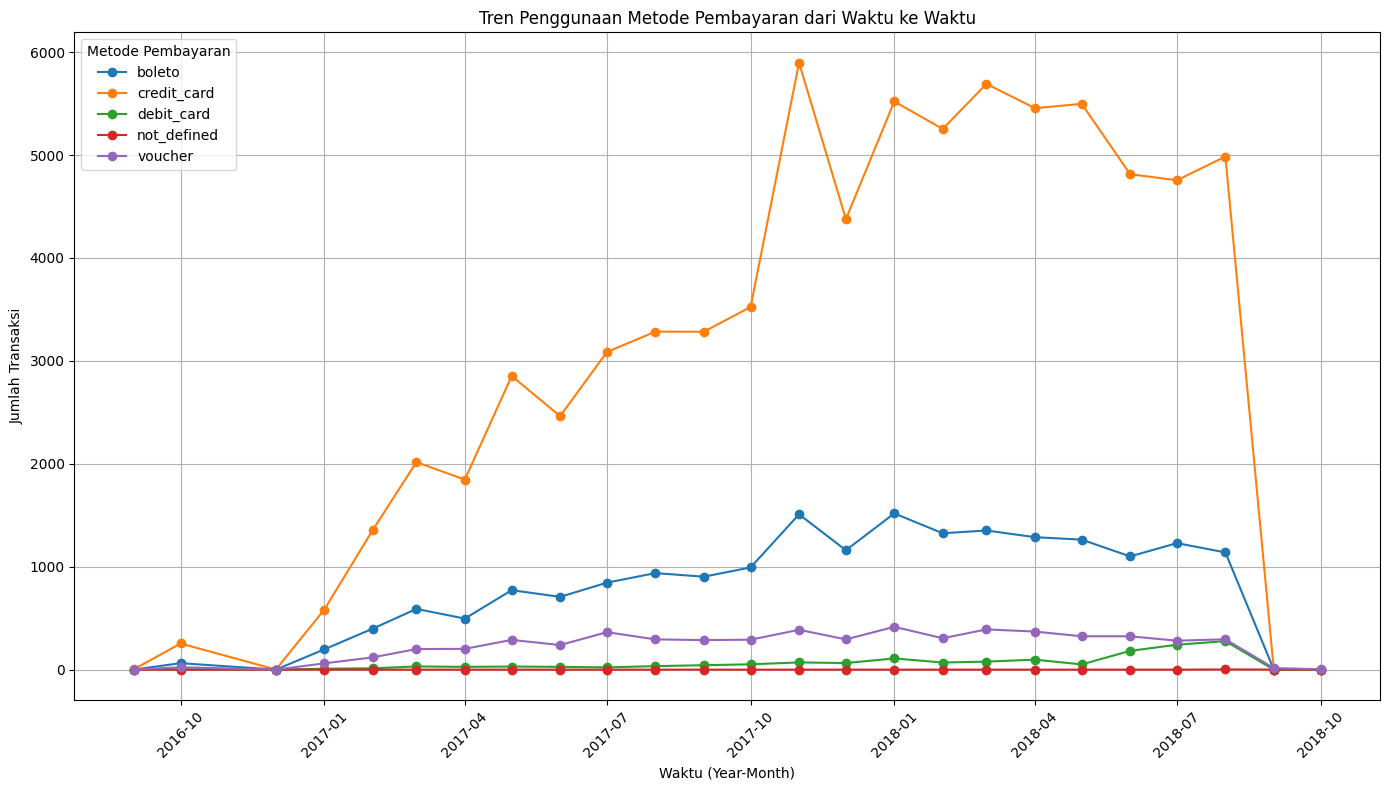

In [171]:
payment_trends = payments_orders_df.groupby(['year_month', 'payment_type']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))

for payment_type in payment_trends.columns:
    plt.plot(payment_trends.index.to_timestamp(), payment_trends[payment_type], marker='o', label=payment_type)

plt.title('Tren Penggunaan Metode Pembayaran dari Waktu ke Waktu')
plt.xlabel('Waktu (Year-Month)')
plt.ylabel('Jumlah Transaksi')
plt.legend(title='Metode Pembayaran')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

## Conclusion

- Conclution pertanyaan 1 (Apa distribusi frekuensi pembelian berdasarkan wilayah atau kota pelanggan?)

Hasil analisis distribusi frekeunsi pembelian berdasarkan wilayah atau kota pelanggan menunjukkan variasi yang signifikan dalam jumlah pembelian di berbagai kota. Berikut ini kota-kota yang memiliki frekuensi pembelian tertinggi menggunakan platform E-commerce :
1. Sao Paulo - 15540

Kota ini memiliki jumlah pembelian tertinggi dibandingkan kota-kota lain.

2. Rio de Janeiro - 6882

Kota ini kedua tertinggi setelah Sao Paulo dengan jumlah frekuensi pembelian kedua tertinggi.

3. Belo Horizonte - 2773

Kota ini ketiga tertinggi setelah Rio de Janeiro dengan jumlah frekuensi pembelian ketiga tertinggi.


Dengan hasil tersebut dapat mengetahui frekuensi pembelian setiap kota melalui E-Commerce dan menentukan strategi yang tepat dalam pemasaran dan penjualan. Hasil ini dapat digunakan untuk memprioritaskan di kota-kota dengan frekuensi pembelian tinggi. Memahami dinamika pasar di kota-kota utama dapat membantu dalam merancang advertisement yang lebih efektif dan mengalokasikan sumber daya secara optimal. 

- Conclution pertanyaan 2 (Apa metode pembayaran yang paling sering digunakan oleh pelanggan, dan bagaimana tren ini berubah dari waktu ke waktu?)

Berdasarkan hasil analisis metode pembayaran yang paling sering digunakan oleh pelanggan dalam menggunakan platform E-Commerce berikut ini :

1. Credit Card - 76795 (73.922%)
2. Boleto - 19784 (19.044%)
3. Voucher - 5775 (5.559%)

Dapat dilihat bahwa Kartu Kredit adalah metode pembayaran yang laing sering digunakan oleh pelanggan. Hal ini menunjukkan bahwa pelanggan lebih memilih menggunakan kartu kredit untuk setiap transaksi mereka.

Tren pembayaran dari waktu ke waktu juga menunjukkan bahwa E-Wallet dan transfer bank pertumbuhannya lebih peningkat seiring berjalannya waktu. Peningkatan tersebut dapat terindikasi karena kemudahan akses dan integrasi dengan aplikasi E-Commerce. Metode pembayaran ini terpengaruh dengan kemajuan teknologi dimana adopsi pembayaran digital dan mobile wallets yang semakin berkembang sehingga memungkinkan terjadinya perubahan tren, karena pelanggan memanfaatkan metode teknologi baru yang lebih mudah.